In [1]:
import pandas as pd
from scipy import stats
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
ss = pdr.get_data_yahoo('005930.KS',start='2005-01-04')
msft = pdr.get_data_yahoo('MSFT',start='2005-01-04')

dow = pdr.get_data_yahoo('^DJI', '2005-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2005-01-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


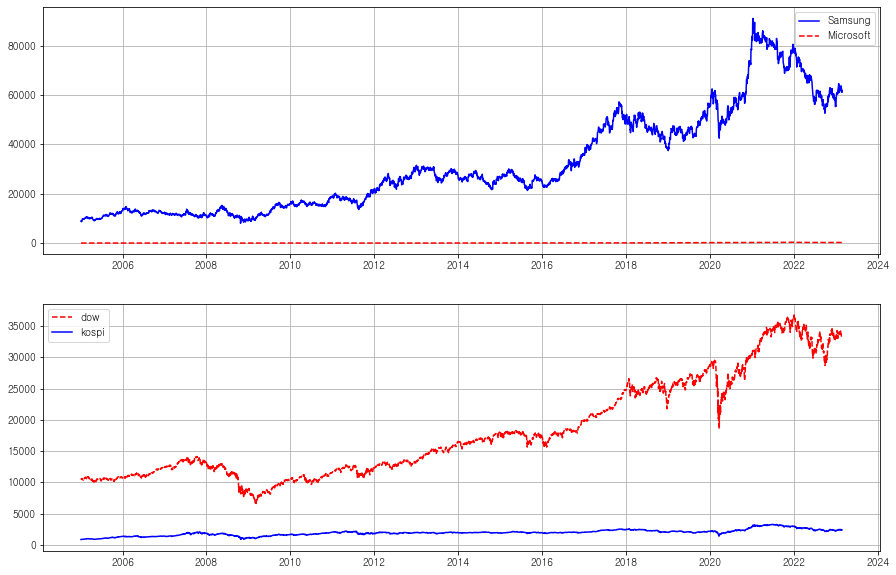

In [19]:
plt.figure(figsize=(15,10))

plt.subplot(211)
plt.plot(ss.index, ss.Close, 'b', label='Samsung')
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.grid(True)
plt.legend(loc='best');

plt.subplot(212)
plt.plot(dow.index, dow.Close, 'r--', label='dow')
plt.plot(kospi.index, kospi.Close, 'b', label='kospi')
plt.grid(True)
plt.legend(loc='best')
            
plt.show();

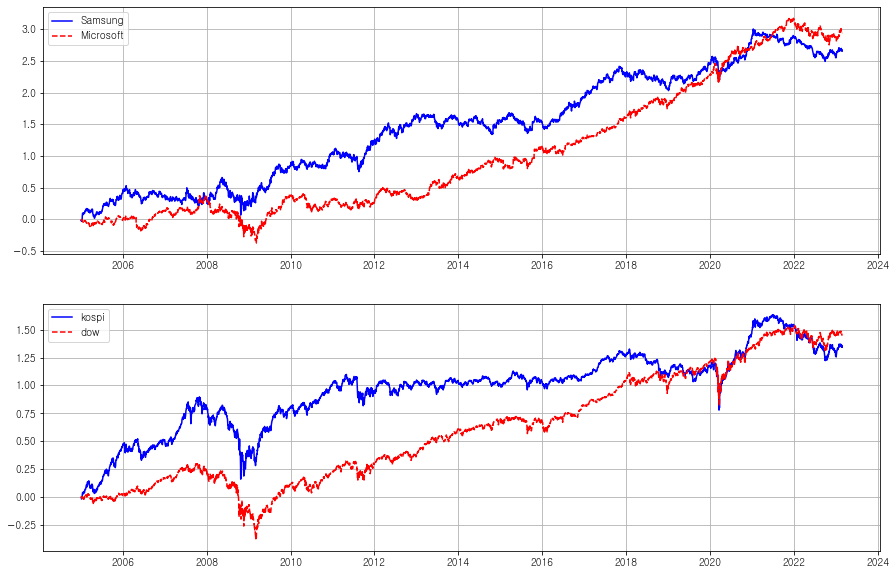

In [22]:
ss_ret_daily = ss.pct_change().cumsum()
msft_ret_daily = msft.pct_change().cumsum()
dow_ret_daily = dow.pct_change().cumsum()
kospi_ret_daily = kospi.pct_change().cumsum()

plt.figure(figsize=(15,10))

plt.subplot(211)
plt.plot(ss_ret_daily.index, ss_ret_daily.Close, 'b', label='Samsung')
plt.plot(msft_ret_daily.index, msft_ret_daily.Close, 'r--', label='Microsoft')
plt.grid(True)
plt.legend(loc='best');

plt.subplot(212)
plt.plot(kospi_ret_daily.index, kospi_ret_daily.Close, 'b', label='kospi')
plt.plot(dow_ret_daily.index, dow_ret_daily.Close, 'r--', label='dow')

plt.grid(True)
plt.legend(loc='best')
            
plt.show();

In [11]:
df = pd.DataFrame({'SAMSUNG':ss['Close'], 'MSFT':msft['Close'], 
                   'DOW':dow['Close'], 'KOSPI':kospi['Close']})

# 결측치 채워주기
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

In [14]:
regr_kor = stats.linregress(df['KOSPI'], df['SAMSUNG'])
regr_kor_line = f'Y = {regr_kor.slope:2f}X + {regr_kor.intercept:2f}'
print(regr_kor)

regr_us = stats.linregress(df['DOW'], df['MSFT'])
regr_us_line = f'Y = {regr_us.slope:2f}X + {regr_us.intercept:2f}'
print(regr_us)

LinregressResult(slope=37.70545622298346, intercept=-42318.700910070154, rvalue=0.8871368949310642, pvalue=0.0, stderr=0.2859640535685239, intercept_stderr=578.720557145993)
LinregressResult(slope=0.00984992122395093, intercept=-98.16422164167706, rvalue=0.935220479270438, pvalue=0.0, stderr=5.4365454842610115e-05, intercept_stderr=1.0785196125881444)


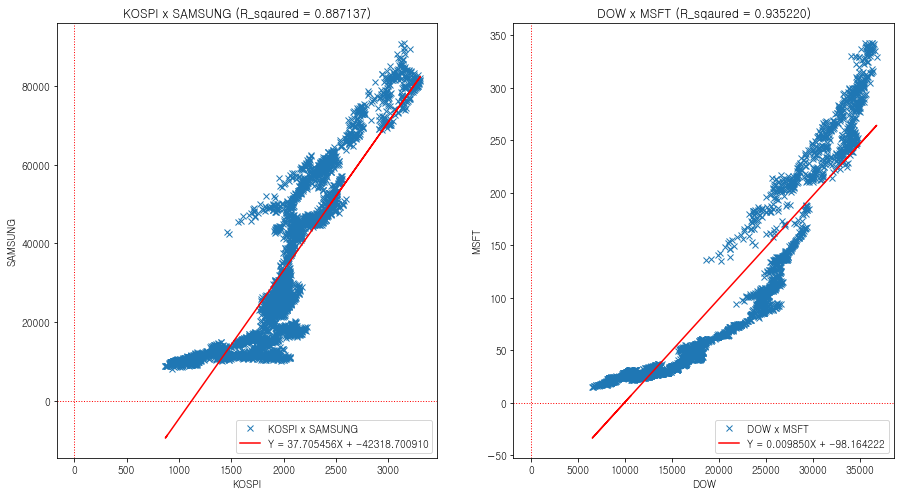

In [17]:
plt.figure(figsize=(15,8))

plt.subplot(121)
plt.plot(df.KOSPI, df.SAMSUNG, 'x') 
plt.plot(df.KOSPI, regr_kor.slope * df.KOSPI + regr_kor.intercept, 'r')
plt.legend(['KOSPI x SAMSUNG', regr_kor_line])
plt.title(f'KOSPI x SAMSUNG (R_sqaured = {regr_kor.rvalue:2f})')
plt.xlabel('KOSPI')
plt.ylabel('SAMSUNG')
plt.axvline(x=0, color='r', linestyle=':', linewidth=1)
plt.axhline(y = 0, color='r', linestyle=':', linewidth=1)

plt.subplot(122)

plt.plot(df.DOW, df.MSFT, 'x') 
plt.plot(df.DOW, regr_us.slope * df.DOW + regr_us.intercept, 'r')
plt.legend(['DOW x MSFT', regr_us_line])
plt.title(f'DOW x MSFT (R_sqaured = {regr_us.rvalue:2f})')
plt.xlabel('DOW')
plt.ylabel('MSFT')
plt.axvline(x=0, color='r', linestyle=':', linewidth=1)
plt.axhline(y = 0, color='r', linestyle=':', linewidth=1)
plt.show();

In [18]:
df.corr()

,SAMSUNG,MSFT,DOW,KOSPI
SAMSUNG,1.000000,0.913662,0.962602,0.887137
MSFT,0.913662,1.000000,0.935220,0.760391
DOW,0.962602,0.935220,1.000000,0.850333
KOSPI,0.887137,0.760391,0.850333,1.000000


- 주식은 우상향하므로 주가 그냥 쓰면 상관계수 높다

# 수익률 상관관계

In [3]:
df = pd.DataFrame({'SAMSUNG':ss['Close'], 'MSFT':msft['Close'], 
                   'DOW':dow['Close'], 'KOSPI':kospi['Close']})

# 결측치 채워주기
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

# 수익률전환
df = df.pct_change().dropna()
df

,SAMSUNG,MSFT,DOW,KOSPI
Date,,,,
2005-01-05,-0.008949,-0.002235,-0.003100,-0.001928
2005-01-06,-0.018059,-0.001120,0.002364,-0.015714
2005-01-07,0.012644,-0.002991,-0.001781,-0.000505
2005-01-10,-0.005675,0.004874,0.001610,0.003835
2005-01-11,0.009132,-0.002612,-0.006102,0.011565
...,...,...,...,...
2023-02-20,0.001597,-0.020887,-0.020608,0.001595
2023-02-21,-0.009569,0.000000,0.000000,0.001564
2023-02-22,-0.016103,-0.004591,-0.002551,-0.016788


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4706 entries, 2005-01-05 to 2023-02-24
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SAMSUNG  4706 non-null   float64
 1   MSFT     4706 non-null   float64
 2   DOW      4706 non-null   float64
 3   KOSPI    4706 non-null   float64
dtypes: float64(4)
memory usage: 183.8 KB


# beta

In [5]:
regr_kor = stats.linregress(df['KOSPI'], df['SAMSUNG'])
regr_kor_line = f'Y = {regr_kor.slope:2f}X + {regr_kor.intercept:2f}'
print(regr_kor)

regr_us = stats.linregress(df['DOW'], df['MSFT'])
regr_us_line = f'Y = {regr_us.slope:2f}X + {regr_us.intercept:2f}'
print(regr_us)

LinregressResult(slope=1.0279496952008842, intercept=0.0002705677106286704, rvalue=0.7000772896950771, pvalue=0.0, stderr=0.015287315372895984, intercept_stderr=0.00018385539094786075)
LinregressResult(slope=0.4826057259641165, intercept=7.432359020571443e-06, rvalue=0.7136684701914816, pvalue=0.0, stderr=0.006906536218948693, intercept_stderr=0.00011857160668595049)


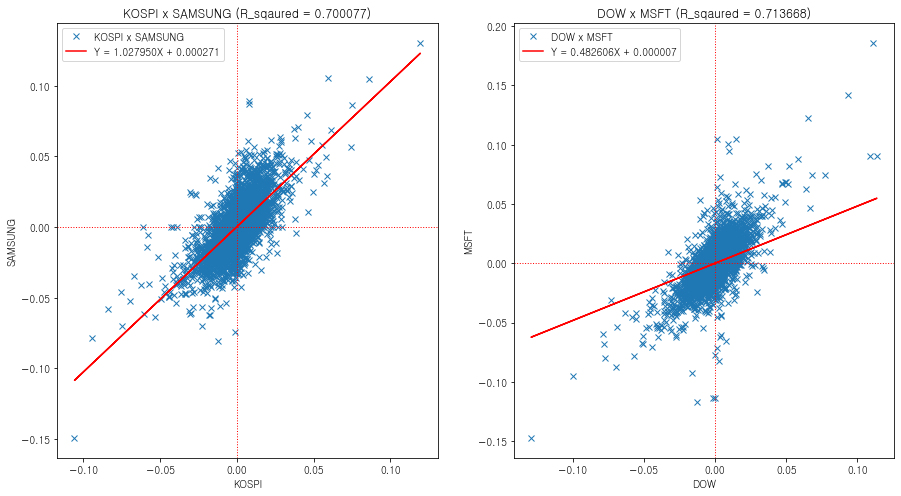

In [6]:
plt.figure(figsize=(15,8))

plt.subplot(121)
plt.plot(df.KOSPI, df.SAMSUNG, 'x') 
plt.plot(df.KOSPI, regr_kor.slope * df.KOSPI + regr_kor.intercept, 'r')
plt.legend(['KOSPI x SAMSUNG', regr_kor_line])
plt.title(f'KOSPI x SAMSUNG (R_sqaured = {regr_kor.rvalue:2f})')
plt.xlabel('KOSPI')
plt.ylabel('SAMSUNG')
plt.axvline(x=0, color='r', linestyle=':', linewidth=1)
plt.axhline(y = 0, color='r', linestyle=':', linewidth=1)

plt.subplot(122)

plt.plot(df.DOW, df.MSFT, 'x') 
plt.plot(df.DOW, regr_us.slope * df.DOW + regr_us.intercept, 'r')
plt.legend(['DOW x MSFT', regr_us_line])
plt.title(f'DOW x MSFT (R_sqaured = {regr_us.rvalue:2f})')
plt.xlabel('DOW')
plt.ylabel('MSFT')
plt.axvline(x=0, color='r', linestyle=':', linewidth=1)
plt.axhline(y = 0, color='r', linestyle=':', linewidth=1)
plt.show();

In [7]:
df.corr()

,SAMSUNG,MSFT,DOW,KOSPI
SAMSUNG,1.000000,0.049464,0.119923,0.700077
MSFT,0.049464,1.000000,0.713668,0.133098
DOW,0.119923,0.713668,1.000000,0.223333
KOSPI,0.700077,0.133098,0.223333,1.000000


In [8]:
regr_stock = stats.linregress(df['MSFT'], df['SAMSUNG'])
regr_stock_line = f'Y = {regr_stock.slope:2f}X + {regr_stock.intercept:2f}'
print(regr_stock)

regr_index = stats.linregress(df['DOW'],df['KOSPI'])
regr_index_line = f'Y = {regr_index.slope:2f}X + {regr_index.intercept:2f}'
print(regr_index)

LinregressResult(slope=0.050898769210643076, intercept=0.0005328859231429367, rvalue=0.04946425104957387, pvalue=0.0006876949784215922, stderr=0.014984775427423668, intercept_stderr=0.0002572590430182719)
LinregressResult(slope=0.23144450665264715, intercept=0.000214587568052858, rvalue=0.2233329831911692, pvalue=2.8345574011974484e-54, stderr=0.014728215406112192, intercept_stderr=0.0001709355741710196)


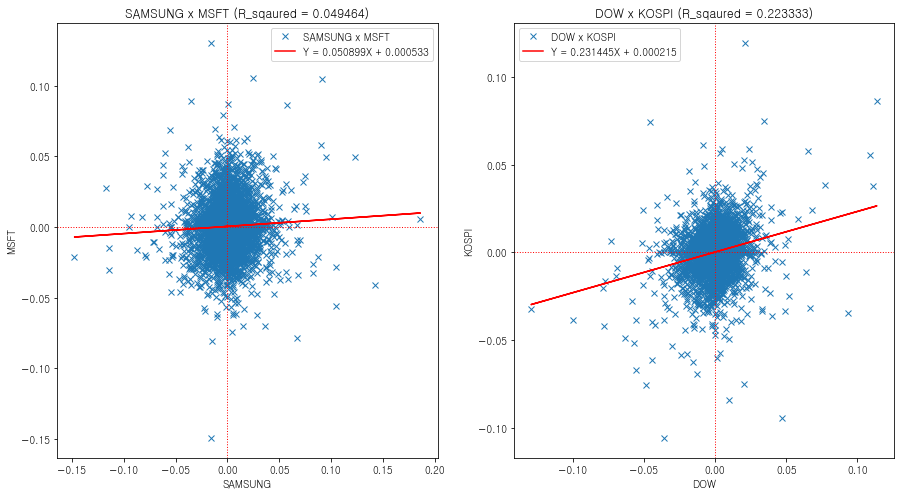

In [9]:
plt.figure(figsize=(15,8))

plt.subplot(121)
plt.plot(df.MSFT, df.SAMSUNG, 'x') 
plt.plot(df.MSFT, regr_stock.slope * df.MSFT + regr_stock.intercept, 'r')
plt.legend(['SAMSUNG x MSFT', regr_stock_line])
plt.title(f'SAMSUNG x MSFT (R_sqaured = {regr_stock.rvalue:2f})')
plt.xlabel('SAMSUNG')
plt.ylabel('MSFT')
plt.axvline(x=0, color='r', linestyle=':', linewidth=1)
plt.axhline(y = 0, color='r', linestyle=':', linewidth=1)

plt.subplot(122)
plt.plot(df.DOW, df.KOSPI, 'x') 
plt.plot(df.DOW, regr_index.slope * df.DOW + regr_index.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_index_line])
plt.title(f'DOW x KOSPI (R_sqaured = {regr_index.rvalue:2f})')
plt.xlabel('DOW')
plt.ylabel('KOSPI')
plt.axvline(x=0, color='r', linestyle=':', linewidth=1)
plt.axhline(y = 0, color='r', linestyle=':', linewidth=1)
plt.show();

In [10]:
df.corr()

,SAMSUNG,MSFT,DOW,KOSPI
SAMSUNG,1.000000,0.049464,0.119923,0.700077
MSFT,0.049464,1.000000,0.713668,0.133098
DOW,0.119923,0.713668,1.000000,0.223333
KOSPI,0.700077,0.133098,0.223333,1.000000
